In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ibge-municipios-ufs-shape/BR_UF_2020.dbf
/kaggle/input/ibge-municipios-ufs-shape/BR_UF_2020.prj
/kaggle/input/ibge-municipios-ufs-shape/BR_Municipios_2020.shp
/kaggle/input/ibge-municipios-ufs-shape/BR_Municipios_2020.cpg
/kaggle/input/ibge-municipios-ufs-shape/BR_Municipios_2020.prj
/kaggle/input/ibge-municipios-ufs-shape/BR_UF_2020.cpg
/kaggle/input/ibge-municipios-ufs-shape/BR_Municipios_2020.shx
/kaggle/input/ibge-municipios-ufs-shape/BR_UF_2020.shx
/kaggle/input/ibge-municipios-ufs-shape/BR_UF_2020.shp
/kaggle/input/ibge-municipios-ufs-shape/BR_Municipios_2020.dbf
/kaggle/input/economy-and-population-of-cities-in-brazil-ibge/Cities_Brazil_IBGE.xlsx
/kaggle/input/crimes-brazil/crimes_brazil.xlsx


In [2]:
!pip3 install openpyxl 

     |████████████████████████████████| 242 kB 4.2 MB/s            


In [3]:
crimes = pd.read_excel('/kaggle/input/crimes-brazil/crimes_brazil.xlsx', sheet_name = 'Ocorrências')
cities = pd.read_excel('../input/economy-and-population-of-cities-in-brazil-ibge/Cities_Brazil_IBGE.xlsx')
states = cities.groupby('LocalUF').sum().reset_index()
crimes.head()
cities.head()
states

,LocalUF,IBGECode,PopEstimada_2018,PopCenso 2010,ReceitasRealizadas_2014,DespesasEmpenhadas_2014
0,AC,26407719,869265,733559,532062,539674
1,AL,275887914,3322820,3120494,4361246,4992385
2,AM,80734451,4080611,3483985,7597716,6910609
3,AP,25605908,829494,669526,826438,681711
4,BA,1216451757,14812617,14016906,26343259,24917440
5,CE,424495156,9075649,8452381,18125585,17042936
6,DF,5300108,2974703,2570160,20665448,19008773
7,ES,249826710,3972388,3514952,8302758,7466006
8,GO,1281988737,6921161,6003788,14161338,13166398
9,MA,457104205,7035055,6574789,11590302,11382671


In [4]:
crimes_grouped = crimes.groupby(['UF','Tipo Crime']).sum('Ocorrências').reset_index()
#crimes_grouped

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


<AxesSubplot:>

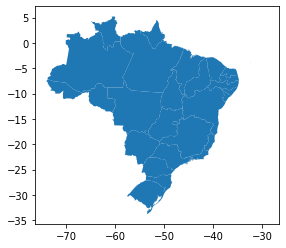

In [5]:
import geopandas as gpd

shp_bra = gpd.read_file('../input/ibge-municipios-ufs-shape/BR_UF_2020.shp')
shp_bra.plot()
#shp_bra

In [6]:
crimes_geo =  shp_bra.merge(crimes_grouped, how = 'inner',left_on= 'NM_UF', right_on = 'UF').merge(
states, how = 'inner', left_on = 'SIGLA_UF', right_on = 'LocalUF')
crimes_geo['ocorrencias/pop2018'] = crimes_geo['Ocorrências']/crimes_geo['PopEstimada_2018']
#crimes_geo

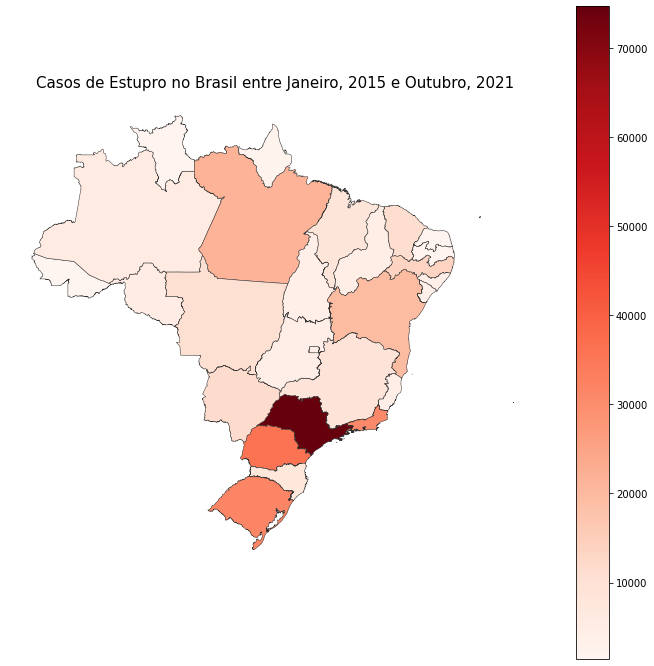

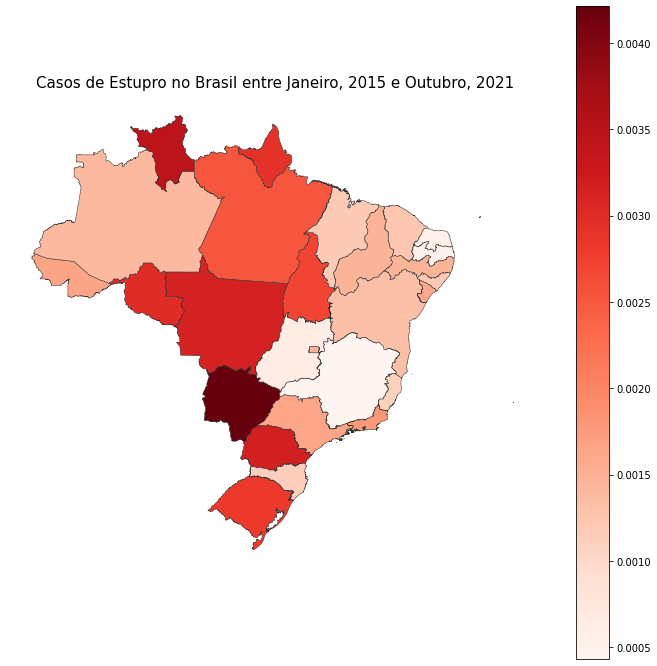

In [7]:
import matplotlib.pyplot as plt

crimes_estupro = crimes_geo[crimes_geo['Tipo Crime'] == 'Estupro'].set_index('UF')


fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Casos de Estupro no Brasil entre Janeiro, 2015 e Outubro, 2021',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = crimes_estupro.plot(column='Ocorrências', cmap='Reds', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Casos de Estupro no Brasil entre Janeiro, 2015 e Outubro, 2021',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = crimes_estupro.plot(column='ocorrencias/pop2018', cmap='Reds', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)